# Exploring Hate Crime Rates in NYC from 2019-2024
## Research Questions
1. How has the rate of hate crime changed over the last 5 years?
2. How has anti-semitic and anti-muslim hate crime changed since the beginning of the recent conflict between Israel and Palestine?
3. What types of hate crimes are most reportedly perpetuated against jewish individuals in NYC?
4. What boroughs of NYC see the highest hate crime rates?

# Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("NYPD_Hate_Crimes.csv")

C:\Users\guarnerij2\AppData\Local\Temp\ipykernel_22184\750864527.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Cleaning

In [2]:
#convert dates to datetime
df['Record Create Date'] = pd.to_datetime(df['Record Create Date'], errors='coerce', utc=True)
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], errors='coerce', utc=True).fillna(pd.NaT)

In [3]:
#Light data cleanup and dtype check
df.dtypes
df = df.fillna(" ")

In [4]:
df.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201906012119317,2019,1,2019-01-23 00:00:00+00:00,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,,
1,201906012175717,2019,2,2019-02-25 00:00:00+00:00,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,,
2,201906012180117,2019,2,2019-02-27 00:00:00+00:00,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,,
3,201906012273417,2019,4,2019-04-16 00:00:00+00:00,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,,
4,201906012413717,2019,6,2019-06-20 00:00:00+00:00,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,,


# NYC Hate Crimes Over Time, by type

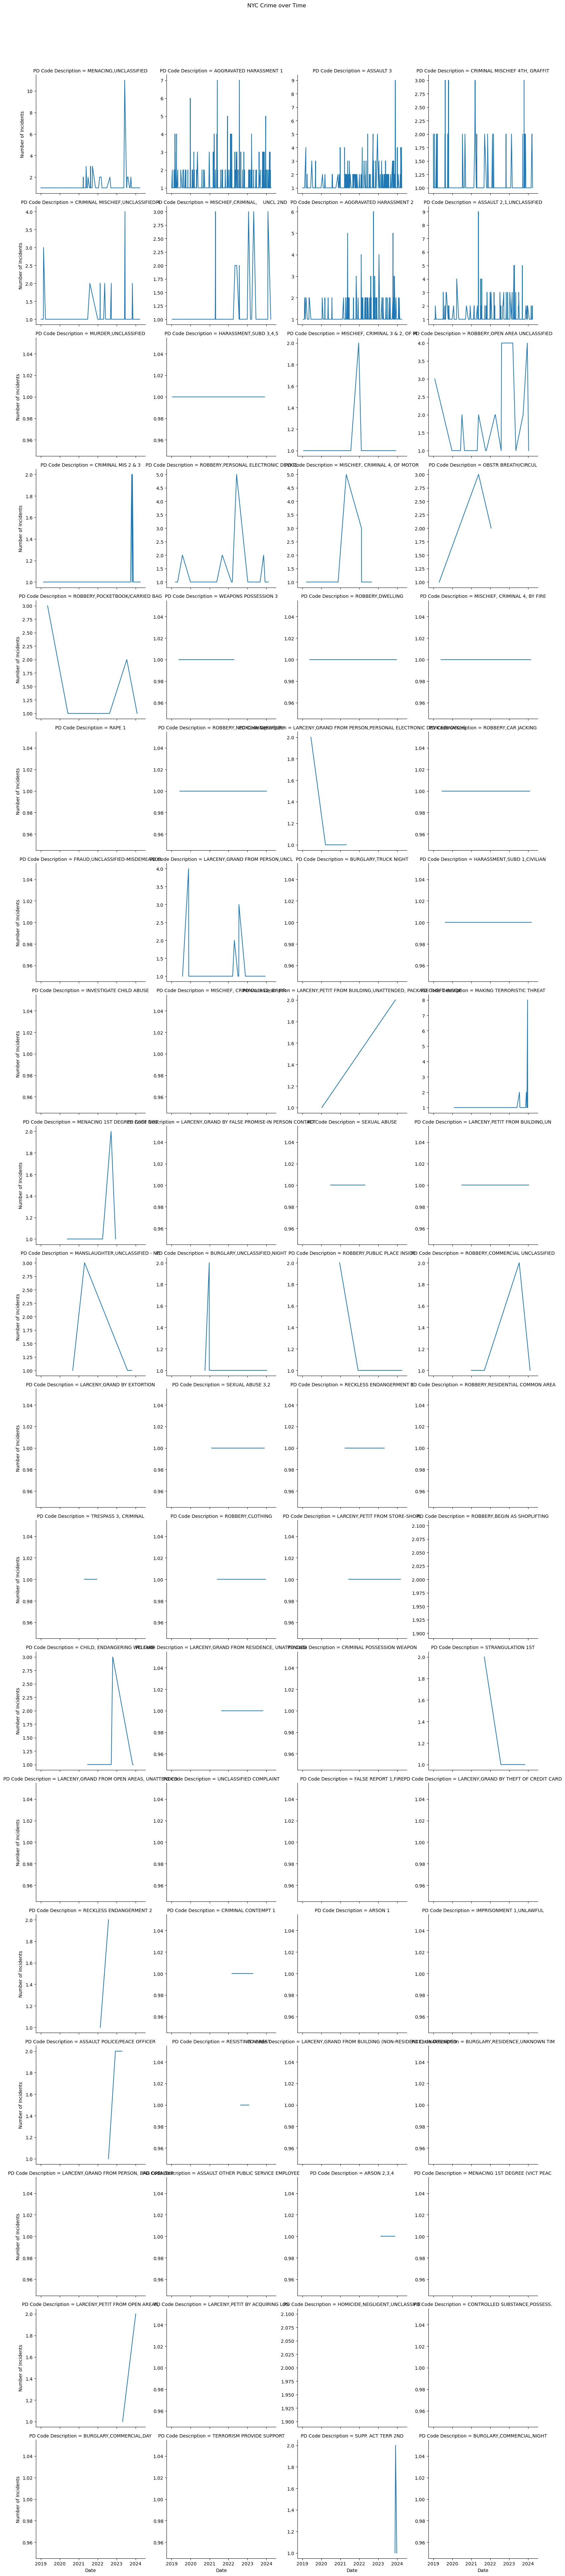

In [5]:
#Plotting hate crime rates over time by crime type
import seaborn as sns
# Group by 'Record Create Date' and 'PD Code Description', and count incidents
timeseries3 = df.groupby(['Record Create Date', 'PD Code Description'])['Full Complaint ID'].count().to_frame('incident_count').reset_index()

# Create faceted plot
g = sns.FacetGrid(timeseries3, col='PD Code Description', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='Record Create Date', y='incident_count')

# Add title/labels
g.fig.suptitle('NYC Crime over Time', y=1.02)
g.set_axis_labels('Date', 'Number of Incidents')


plt.tight_layout()
plt.show()

# 2023 Hate Crime Rates

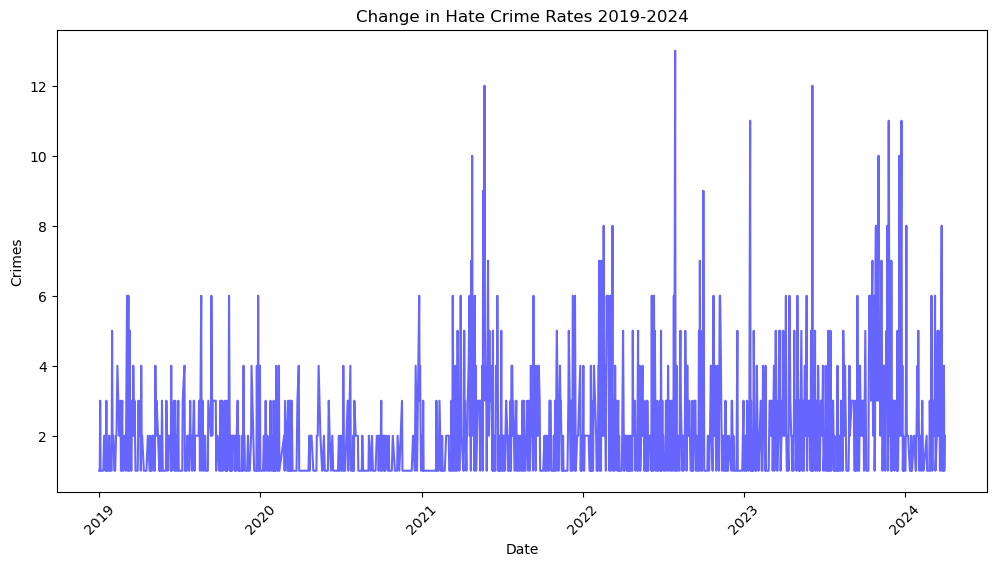

In [6]:

timeseries_all = df.groupby('Record Create Date')['Full Complaint ID'].count().to_frame("Number_of_Incidents").reset_index()

# Plot over time
plt.figure(figsize=(12, 6))
plt.plot(timeseries_all['Record Create Date'], timeseries_all['Number_of_Incidents'], color='blue', alpha=0.6)

# Add title and labels
plt.title('Change in Hate Crime Rates 2019-2024')
plt.xlabel('Date')
plt.ylabel('Crimes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

# Exploring Variation in Bias Type, 2023

In [7]:
df_2023 = df.loc[df['Complaint Year Number'] == 2023]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'ANTI-JEWISH'),
  Text(1, 0, 'ANTI-MALE HOMOSEXUAL (GAY)'),
  Text(2, 0, 'ANTI-ASIAN'),
  Text(3, 0, 'ANTI-HISPANIC'),
  Text(4, 0, 'ANTI-BLACK'),
  Text(5, 0, 'ANTI-FEMALE HOMOSEXUAL (LESBIAN)'),
  Text(6, 0, 'ANTI-WHITE'),
  Text(7, 0, 'ANTI-MUSLIM'),
  Text(8, 0, 'ANTI-PROTESTANT'),
  Text(9, 0, 'ANTI-GENDER NON-CONFORMING'),
  Text(10, 0, 'ANTI-CATHOLIC'),
  Text(11, 0, 'ANTI-SIKH'),
  Text(12, 0, 'ANTI-OTHER ETHNICITY'),
  Text(13, 0, 'ANTI-TRANSGENDER'),
  Text(14, 0, 'ANTI-BUDDHIST'),
  Text(15, 0, 'ANTI-MALE')])

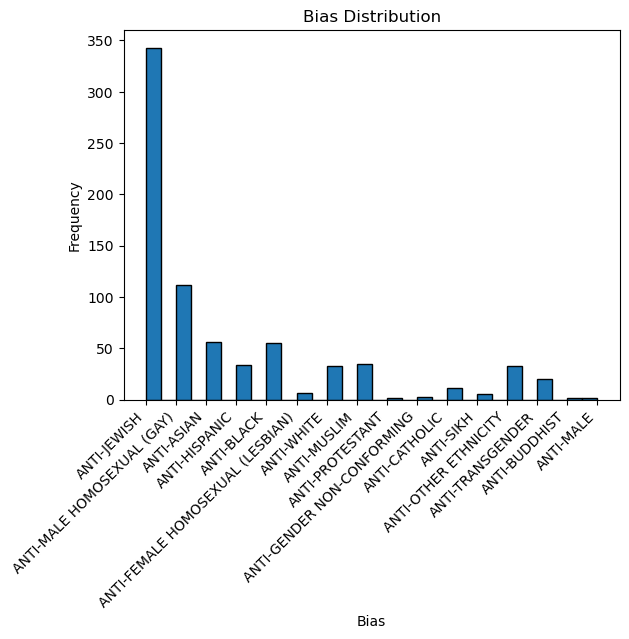

In [8]:
#Plotting Histogram of Bias Types
plt.hist(df_2023['Bias Motive Description'], bins=30, edgecolor='black')
plt.title('Bias Distribution')
plt.xlabel('Bias')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Anti-Jewish Hate Crimes in 2023

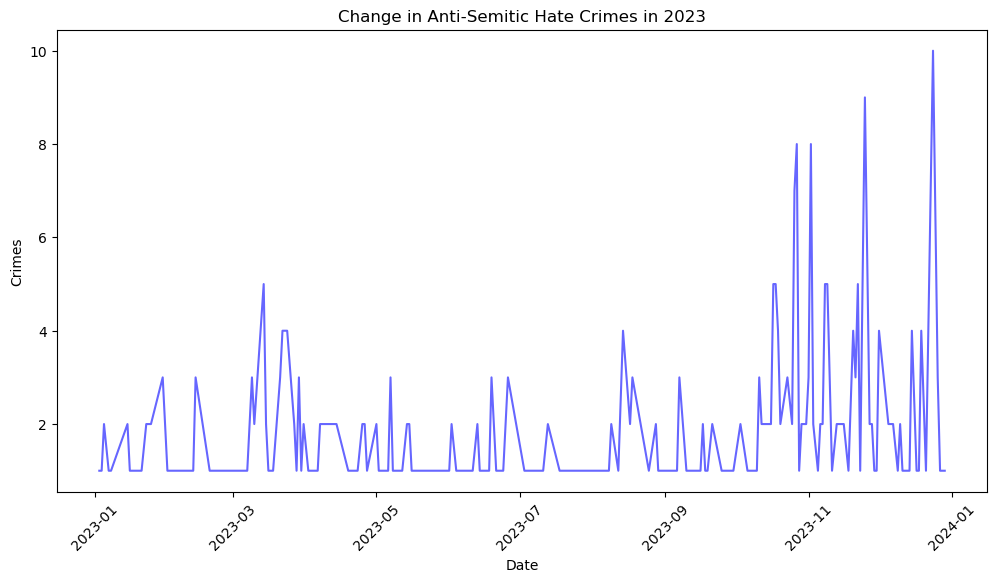

In [9]:
# Group by motive and complaint id
df_2023_as = df_2023.loc[df_2023['Bias Motive Description']=='ANTI-JEWISH']
timeseries = df_2023_as.groupby('Record Create Date')['Full Complaint ID'].count().to_frame("Number_of_Incidents").reset_index()

# Plot over time
plt.figure(figsize=(12, 6))
plt.plot(timeseries['Record Create Date'], timeseries['Number_of_Incidents'], color='blue', alpha=0.6)

# Add title and labels
plt.title('Change in Anti-Semitic Hate Crimes in 2023')
plt.xlabel('Date')
plt.ylabel('Crimes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

# Comparison with Muslim Hate Crime

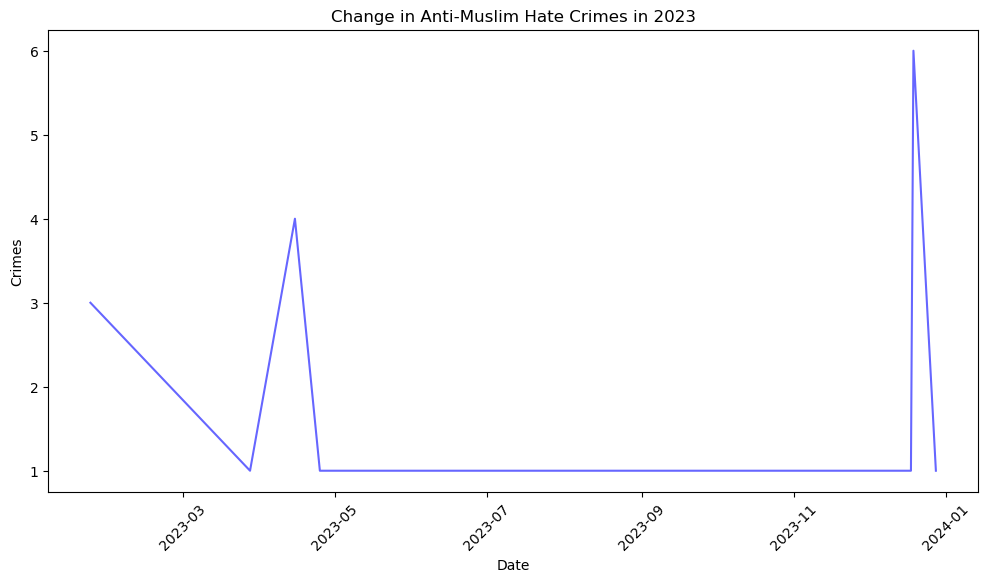

In [10]:
# Group by complaint id
df_2023_am = df_2023.loc[df_2023['Bias Motive Description']=='ANTI-MUSLIM']
timeseries2 = df_2023_am.groupby('Record Create Date')['Full Complaint ID'].count().to_frame("Number_of_Incidents").reset_index()

# Plot over time
plt.figure(figsize=(12, 6))
plt.plot(timeseries2['Record Create Date'], timeseries2['Number_of_Incidents'], color='blue', alpha=0.6)

# Add title and labels
plt.title('Change in Anti-Muslim Hate Crimes in 2023')
plt.xlabel('Date')
plt.ylabel('Crimes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

# Anti-Jewish Hate Crime by Borough and Number of Incidents

In [11]:
df_2023_as.groupby(['Patrol Borough Name'])['Full Complaint ID'].count().to_frame(
    "Number of Incidents").sort_values('Number of Incidents', ascending=False).reset_index()

,Patrol Borough Name,Number of Incidents
0,PATROL BORO BKLYN SOUTH,84
1,PATROL BORO MAN NORTH,73
2,PATROL BORO MAN SOUTH,51
3,PATROL BORO BKLYN NORTH,42
4,PATROL BORO QUEENS NORTH,33
5,PATROL BORO QUEENS SOUTH,30
6,PATROL BORO BRONX,17
7,PATROL BORO STATEN ISLAND,13


Brooklyn South, Manhattan North, Manhattan South are top 3

# Anti-Jewish Hate Crime by Crime Type and Number of Incidents

In [12]:
df_2023_as.groupby(['PD Code Description'])['Full Complaint ID'].count().to_frame(
    "Number of Incidents").sort_values('Number of Incidents', ascending=False).reset_index()

,PD Code Description,Number of Incidents
0,AGGRAVATED HARASSMENT 1,134
1,AGGRAVATED HARASSMENT 2,47
2,"CRIMINAL MISCHIEF 4TH, GRAFFIT",29
3,ASSAULT 3,26
4,MAKING TERRORISTIC THREAT,21
5,"ASSAULT 2,1,UNCLASSIFIED",17
6,CRIMINAL MIS 2 & 3,15
7,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",9
8,"MISCHIEF,CRIMINAL, UNCL 2ND",9
9,"MENACING,UNCLASSIFIED",7


Aggravated Harassment, Criminal Mischief and Assault at top of list

# Summary
1. Overall hate crime rate has increased since 2019, though from 2021-2024, it has remained somewhat steady despite a few spikes.
2. Anti-semitic hate crime saw a large spike in fall of 2023, which correlates with the conflict between Israel/Palestine following the October 7 attacks in Israel. Muslim hate crime also saw a spike at the end of 2023
3. Aggravated Harassment, Criminal Mischief, and Assault are the most common hate crimes perpetuated against Jewish individuals in NYC
4. South Brooklyn, North Manhattan, South Manhattan see the highest anti-semitic hate crime rates
